# Regressão 2

### 1 - Estabelecendo a hipótese a se testar

Formulando a hipótese nula:
$$
H_{0}:\beta = 0, 
$$
**Hipótese nula** ($H_{0}$) - indica que a variável não é relevante ao modelo e pode ser descartada
$$
H_{a}:\beta \neq 0,
$$
agora a variável é relevante ao modelo ($H_{a}$).

- Estatística `t`
$$
t=\frac{\hat{\beta}}{erro-padrão_{\hat{\beta}}} \sim N(\beta, \sigma^{2}_{\beta})
$$

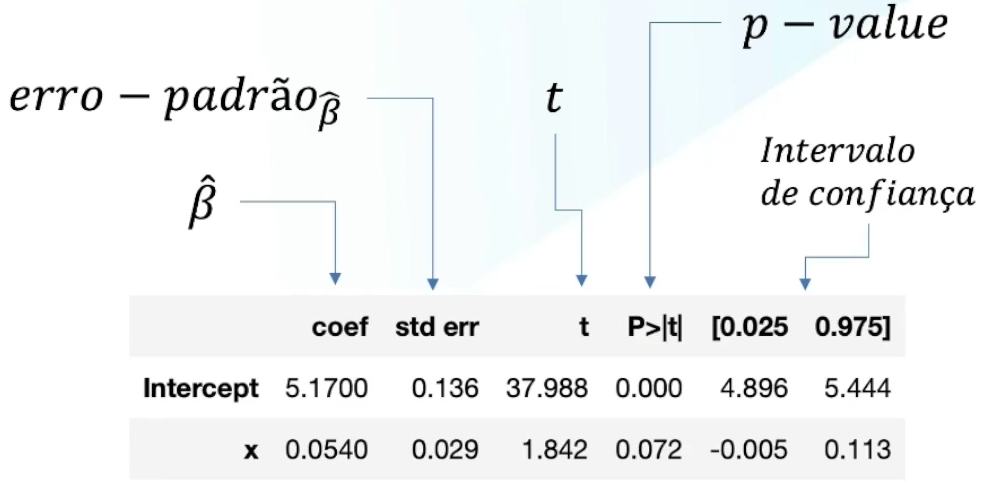

- `coef` - Estimativa do $\beta$
- `std err` - Erro padrão do $\beta$ ($erro-padrão_{\hat{\beta}}$)
- `t` -  Estatística `t`: estimativa / erro padrão
- `P>|t|` - **P-value**: probabilidade de observarmos um novo $\hat{\beta}$ sob $H_{0}$, menos provável que a estimativa atual.
- `Intervalo de confiança` - Pode-se dizer, com 95% de confiança, que o verdadeiro valor do parâmetro está dentro desse intervalo.

# 2 - Variáveis qualitativas 

Para trabalhar com variáveis qualitativas é preciso transformá-las em *dummies*, processo este conhecido como *hot encoding* ou simplesmente *encoding*.

Vamos mergulhar um pouco mais fundo no entendimento de *dummy*.

In [9]:
# importando bibliotecas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrix

In [10]:
# Carregando dataset

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<Axes: xlabel='size', ylabel='tip'>

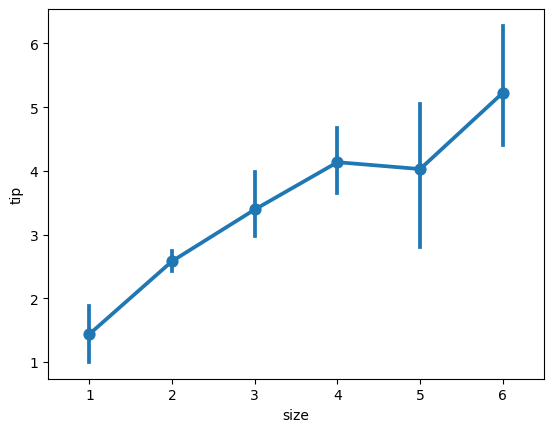

In [11]:
# um pointplot para a variável quatitativa discreta (size)

sns.pointplot(y = 'tip', x='size', data=tips)

In [12]:
# Tornando size uma variável qualitativa

y, x = patsy.dmatrices('tip ~ C(size)', tips)
x

DesignMatrix with shape (244, 6)
  Columns:
    ['Intercept',
     'C(size)[T.2]',
     'C(size)[T.3]',
     'C(size)[T.4]',
     'C(size)[T.5]',
     'C(size)[T.6]']
  Terms:
    'Intercept' (column 0), 'C(size)' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [13]:
# Gerando uma pequena matriz

data = pd.DataFrame({'size': [1,2,3,4,5]})
data

,size
0,1
1,2
2,3
3,4
4,5


In [14]:
# Utilizando a função dmatrix (retorna apena uma matrix)
dmatrix('C(size)', data)

# Gerando as dummies automaticamente

DesignMatrix with shape (5, 5)
  Intercept  C(size)[T.2]  C(size)[T.3]  C(size)[T.4]  C(size)[T.5]
          1             0             0             0             0
          1             1             0             0             0
          1             0             1             0             0
          1             0             0             1             0
          1             0             0             0             1
  Terms:
    'Intercept' (column 0)
    'C(size)' (columns 1:5)

> A **casela de referência** (relacionada ao tamanho de mesa igual a 1) é zero em todas as linhas, pois é a referência e só é 1 quando a mesa for `size=1`.

In [16]:
# Se invertemos os valores em data

data = pd.DataFrame({'size': [1,2,3,5,4]}) #Analise referente a este df
dmatrix('C(size)', data)

DesignMatrix with shape (5, 5)
  Intercept  C(size)[T.2]  C(size)[T.3]  C(size)[T.4]  C(size)[T.5]
          1             0             0             0             0
          1             1             0             0             0
          1             0             1             0             0
          1             0             0             0             1
          1             0             0             1             0
  Terms:
    'Intercept' (column 0)
    'C(size)' (columns 1:5)

In [17]:
# Voltando para "tips"
# Criando a matrix design e a matriz da variável resposta y
y, x = patsy.dmatrices('tip ~ C(size)', data=tips)
x
# size=1 é a casela de referência

DesignMatrix with shape (244, 6)
  Columns:
    ['Intercept',
     'C(size)[T.2]',
     'C(size)[T.3]',
     'C(size)[T.4]',
     'C(size)[T.5]',
     'C(size)[T.6]']
  Terms:
    'Intercept' (column 0), 'C(size)' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [18]:
# Fitting do modelo
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.75
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.17e-13
Time:                        14:21:06   Log-Likelihood:                -390.09
No. Observations:                 244   AIC:                             792.2
Df Residuals:                     238   BIC:                             813.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4375      0.606      2.372      0.018       0.244       2.631
C(size)[T.2]     1.1448      0.614      1.865      0.063      -0.064       2.354
C(size)[T.3]     1.9557      0.637      3.070      0.002       0.701       3.211
C(size)[T.4]     2.6979      0.638      4.229      0.000       1.441       3.955
C(size)[T.5]     2.5905      0.813      3.186      0.002       0.989       4.192
C(size)[T.6]     3.7875      0.857      4.420      0.000       2.099       5.476
==============================================================================
Omnibus:                       77.409   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.825
Skew:                           1.344   Prob(JB):                     6.87e-54
Kurtosis:                       7.106   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Analisando os coef (os coeficientes \beta), para os diferentes tamanhos de mesa (variáveis)

- O Intercept indica para a size=1

**Averiguando** 

$y \approx \alpha + \beta_{2} x_{2} + \beta_{3} x_{3} + ... + \beta_{6} x_{6}$

Só não há $\beta_{1}$, pois é a casela de referência.

Text(0.5, 1.0, 'Médias das mesas com base nos coeficientes da regressão')

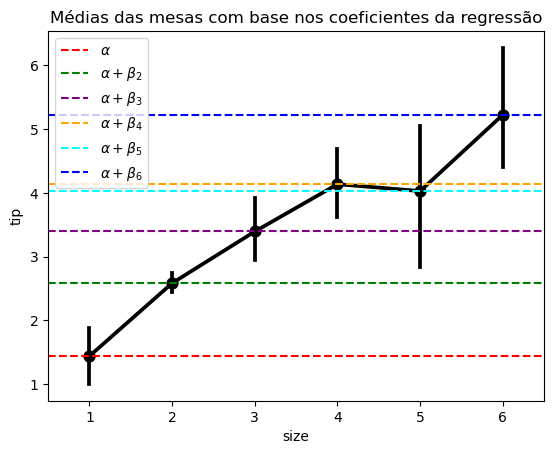

In [20]:
# Plot 
sns.pointplot(x='size', y='tip', data=tips, color='black')

# Adicionando os coeficientes
# Intercept (alpha)
plt.axhline(y=1.4375, color='red', ls='--', label=r'$\alpha$')
# para \beta2 - C(size)[T.2], coef + alpha = 1.1448 + 1.4375
plt.axhline(y=1.1448+1.4375, color='green', ls='--', label=r'$\alpha + \beta_{2}$')
# \beta3 - C(size)[T.3], coef + alpha = 1.9557 + 1.4375
plt.axhline(y=1.9557 + 1.4375, color='purple', ls='--', label=r'$\alpha + \beta_{3}$')
# \beta4 - C(size)[T.4], coef + alpha = 2.6979 + 1.4375
plt.axhline(y=2.6979 + 1.4375, color='orange', ls='--', label=r'$\alpha + \beta_{4}$')
# \beta5 - C(size)[T.5], coef + alpha = 2.5905 + 1.4375
plt.axhline(y=2.5905 + 1.4375, color='cyan', ls='--', label=r'$\alpha + \beta_{5}$')
# \beta6 - C(size)[T.6], coef + alpha = 3.7875 + 1.4375
plt.axhline(y=3.7875 + 1.4375, color='blue', ls='--', label=r'$\alpha + \beta_{6}$')
plt.legend()

plt.title('Médias das mesas com base nos coeficientes da regressão')

A casela de referência é o valor a partir do qual os demais parâmetros são somados para se obter as médias esperadas.

Sempre a média com a referência, ou seja, o valor médio da mesa e o alpha definido a partir da casela de referência.

In [22]:
# Para rodar a casela de referência 

y, x = patsy.dmatrices('tip ~ C(size, Treatment(2))', data=tips)
# Treatment - Indica que agora a casela de referência é a mesa size=2
x

DesignMatrix with shape (244, 6)
  Columns:
    ['Intercept',
     'C(size, Treatment(2))[T.1]',
     'C(size, Treatment(2))[T.3]',
     'C(size, Treatment(2))[T.4]',
     'C(size, Treatment(2))[T.5]',
     'C(size, Treatment(2))[T.6]']
  Terms:
    'Intercept' (column 0), 'C(size, Treatment(2))' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [23]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.75
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.17e-13
Time:                        14:21:06   Log-Likelihood:                -390.09
No. Observations:                 244   AIC:                             792.2
Df Residuals:                     238   BIC:                             813.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.5823      0.097     26.613      0.000       2.391       2.773
C(size, Treatment(2))[T.1]    -1.1448      0.614     -1.865      0.063      -2.354       0.064
C(size, Treatment(2))[T.3]     0.8109      0.219      3.698      0.000       0.379       1.243
C(size, Treatment(2))[T.4]     1.5531      0.222      7.008      0.000       1.117       1.990
C(size, Treatment(2))[T.5]     1.4457      0.551      2.626      0.009       0.361       2.530
C(size, Treatment(2))[T.6]     2.6427      0.614      4.306      0.000       1.434       3.852
==============================================================================
Omnibus:                       77.409   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.825
Skew:                           1.344   Prob(JB):                     6.87e-54
Kurtosis:                       7.106   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **O intercept agora está associado à média das mesas de tamanho 2 e não mais de tamanho 1 como no exemplo anterior.**

<span style='color:red'> A categoria que define a melhor **casela de referência** é aquela que é mais frequente, pois define um melhor erro padrão favorecendo o teste de hipótese (P-value, $P>|T|$). </span>

<Axes: xlabel='size', ylabel='count'>

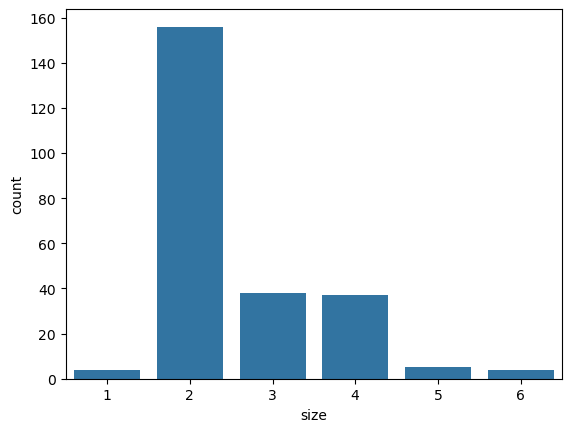

In [26]:
# Note que a mesa size=2 é a mais frequente, que mais se repete
sns.countplot(x='size', data=tips)

# 3 - Qualidade VS complexidade do modelo

Quando se faz uma regressão múltipla, pelo próprio método de mínimos quadrados ordinários (OLS), a métrica $R^{2}$ vai ser necessariamente melhor sempre que adicionarmos uma variável a mais. Por menos sentido que a variável faça, por menos informação que ela agregue, o $R^{2}$ vai ser maior (ou no pior extremo caso, igual) ao que se tinha antes.

Vejamos isso na base das gorjetas.

In [29]:
reg = smf.ols('tip ~ C(size) + np.log(net_bill)', tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.03
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.61e-20
Time:                        14:21:07   Log-Likelihood:                -372.87
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     237   BIC:                             784.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4337      0.646     -0.671      0.503      -1.707       0.840
C(size)[T.2]         0.1059      0.599      0.177      0.860      -1.074       1.285
C(size)[T.3]         0.5071      0.642      0.790      0.431      -0.758       1.772
C(size)[T.4]         0.9752      0.661      1.474      0.142      -0.328       2.278
C(size)[T.5]         0.7856      0.817      0.962      0.337      -0.823       2.395
C(size)[T.6]         1.8341      0.864      2.123      0.035       0.132       3.536
np.log(net_bill)     1.1401      0.190      5.993      0.000       0.765       1.515
==============================================================================
Omnibus:                       74.766   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.626
Skew:                           1.303   Prob(JB):                     5.05e-51
Kurtosis:                       6.999   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

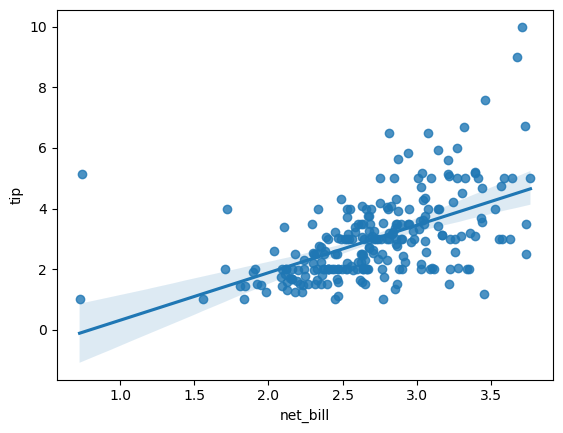

In [30]:
# Entendendo o intercepto negativo

X = np.log(tips['net_bill'])

g = sns.regplot(x=X, y=tips['tip'])
# g.set_xlim(0,4)

Olhando para o painel é possível notar que o intercepto (cruzamento do eixo y) realmente seria um valor negativo, ou seja, não tem muito significado nesta análise. Foquemos nas covariáveis do modelo.

- Vale destacar que os teste do modelo sempre irá depender das variáveis consideradas.

In [33]:
# Alterando o valor da casela de referência 
reg = smf.ols('tip ~ C(size, Treatment(2)) + np.log(net_bill)', tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.03
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.61e-20
Time:                        14:21:07   Log-Likelihood:                -372.87
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     237   BIC:                             784.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.3279      0.494     -0.664      0.508      -1.301       0.645
C(size, Treatment(2))[T.1]    -0.1059      0.599     -0.177      0.860      -1.285       1.074
C(size, Treatment(2))[T.3]     0.4012      0.216      1.859      0.064      -0.024       0.826
C(size, Treatment(2))[T.4]     0.8693      0.236      3.679      0.000       0.404       1.335
C(size, Treatment(2))[T.5]     0.6797      0.530      1.283      0.201      -0.364       1.724
C(size, Treatment(2))[T.6]     1.7283      0.593      2.914      0.004       0.560       2.897
np.log(net_bill)               1.1401      0.190      5.993      0.000       0.765       1.515
==============================================================================
Omnibus:                       74.766   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.626
Skew:                           1.303   Prob(JB):                     5.05e-51
Kurtosis:                       6.999   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Note que agora há mais variáveis segnificantes.

#### Inserindo a variávei `day` e chacando os resultados

In [36]:
reg = smf.ols('tip ~ C(size, Treatment(2)) + np.log(net_bill) + day', tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     13.96
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.16e-18
Time:                        14:21:07   Log-Likelihood:                -372.52
No. Observations:                 244   AIC:                             765.0
Df Residuals:                     234   BIC:                             800.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.3904      0.504     -0.775      0.439      -1.383       0.602
C(size, Treatment(2))[T.1]    -0.1007      0.605     -0.166      0.868      -1.293       1.092
C(size, Treatment(2))[T.3]     0.3880      0.221      1.757      0.080      -0.047       0.823
C(size, Treatment(2))[T.4]     0.8480      0.242      3.510      0.001       0.372       1.324
C(size, Treatment(2))[T.5]     0.6527      0.536      1.217      0.225      -0.404       1.709
C(size, Treatment(2))[T.6]     1.7578      0.604      2.911      0.004       0.568       2.947
day[T.Fri]                     0.1562      0.301      0.520      0.604      -0.436       0.749
day[T.Sat]                     0.0385      0.195      0.197      0.844      -0.346       0.423
day[T.Sun]                     0.1393      0.202      0.689      0.491      -0.259       0.537
np.log(net_bill)               1.1395      0.192      5.931      0.000       0.761       1.518
==============================================================================
Omnibus:                       75.986   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.004
Skew:                           1.318   Prob(JB):                     7.65e-53
Kurtosis:                       7.082   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Mesmo o $R^{2}$ tendo aumentado um pouco, a variável não é significativa para o modelo, de acordo com os p-values. Apenas aumentando a complexidade do modelo.

#### Observações

- O $R^2$ aumentou, embora a variável adicionada não pareça ser significante.
- O $R^2$ sempre vai aumentar. Na pior das hipóteses ele fica igual.
- O modelo ficou mais "complicado".
- Estamos aumentando o risco de "overfitting".
- Esta variável adicional interfere nas estimativas dos demais parâmetros.

### <span style='color:red'>Navalha de Occam</span>

Um princípio conhecido como *[Navalha de Occam](https://en.wikipedia.org/wiki/Occam%27s_razor)* indica que se temos dois modelos com indicadores iguais de qualidade, e um é mais simples, o mais simples é desejável. Dessa forma, diversas propostas surgem na tentativa de "balisar" a quantidade de parâmetros no modelo, como o $R^2$-*ajustado* - que sofre uma penalização por cada parâmetro no modelo e o AIC que vamos discutir adiante.

Com isso em mente, há na literatura diversas alternativas para se considerar a complexidade do modelo na medida de qualidade, como o critério de Akaike (AIC) e o $R^2-ajustado$.

#### AIC

*Akaike´s Information Criterion* (ou critério da informação de Akaike). É uma métrica mais "estatística" de qualidade de ajuste do modelo, desenhada para comparar modelos com diferentes combinações de variáveis. Quanto menor o AIC, melhor o modelo - ou seja, se colocamos uma nova variável no modelo, por esse critério ela é relevante se o AIC diminuir, e não é relevante caso contrário. 

Diferente do $R^2$, o AIC depende do tamanho da amostra, de modo que não tem uma 'regra de bolso' do tipo "perto de 1 é bom", mas é adequado para comparar modelos na mesma amostra.

A Wikipedia tem um artigo interessante sobre o [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion).

#### $R^2-ajustado$

O $R^2$-ajustado procura ponderar o incremento em explicação da variabilidade com o incremento em complexidade do modelo em termos de número de parâmetros. Ele aumenta se o $R^2$ aumentar mais do que o esperado "por acaso", e diminui caso contrário. Sua fórmula é a seguinte:

$$R^2_{aj} = 1- \left[ \frac{(1-R^2)(n-1)}{(n-k-1)} \right]$$

#### Observações do exemplo anterior
Repare que, no exercício anterior, quando inserimos uma variável irrelevante no modelo, o $R^2$ aumentou, mas o $R^2-ajustado$ diminuiu e o AIC aumentou, sugerindo que esta variável não deve entrar no modelo.

# 4 - Selecione modelos

Três algoritmos clássicos na literatura estatística para seleção de variáveis:

- <span style='color:blue'>*Forward*:</span>  
    Parte de um modelo vazio e vai incluindo variáveis estatisticamente relevantes uma a uma, priorizando a mais relevante, até que nenhuma seja incluída. Pode haver alguma variável que deixou de ser relevante na presença daquelas que foram incluídas depois.
    1. Definir um limite *LI* de *p-value* para uma variável ser **incluída** no modelo
    2. Iniciar com um modelo sem variáveis
    3. Para cada variável fora do modelo, testar $\beta = 0$ na presença das demais - armazenar o *p-value*
    4. Se o menor *p-value* for menor que *L*, a variável correspondente é incluída no modelo
    5. Repetir 3 e 4 até que não sejam adicionadas variáveis ao modelo
    <br><br>
- <span style='color:blue'>*Backward*:</span>  
    Parte de um modelo com todas as variáveis possíveis consideradas e vai removendo-as uma a uma, até que nenhuma seja removida. Pode haver variáveis relevantes ainda após o término.
    1. Definir um limite *LE* de *p-value* para uma variável ser **excluída** do modelo
    2. Para cada variável incluída no modelo, testar $\beta = 0$ na presença das demais - armazenar o *p-value*
    3. Se o menor *p-value* for maior que *LE*, a variável é excluída do modelo
    5. Repetir 3 e 4 até que não sejam excluídas mais variáveis do modelo
- <span style='color:blue'>*Stepwise*:</span>
    - É básicamente uma mistura dos dois. Vai incluindo variáveis, eventualmente removendo alguma variável caso seja irrelevante na presença das demais.
    
**Crítica**: Essa abordagem é criticada na comunidade porque esse *p-value* é tido mais como uma referência. Muitos usam esse algoritmo com o critério de Akaike ao invés do *p-value*, ou mesmo as regularizações L1 e L2, com a qual é possível fazer um *grid search* para buscar melhores resultados em previsão.

De qualquer forma, a seleção de um modelo por um desses algoritmos **muito raramente** (pra não dizer nunca) é a escolha final. Sempre há insights e ajustes a serem feitos, categorias a agrupar, variáveis conceitualmente importantes que podem ser priorizadas, multicolinearidade a ser tratada (mais sobre isso adiante), enfim, é um processo meio arte meio ciência suportado por algoritmos menos que executado por algoritmos.

O código abaixo foi extraído e adaptado do fórum [*stackovervlow*](https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-a-forward-selection-stepwise-regression-algorithm), da resposta do David Dale.

- A função de seleção stepwise (ou seleção passo-a-passo) é uma técnica utilizada para selecionar as variáveis mais relevantes em um modelo de regressão, com base em valores p.

- Em cada iteração, a função tenta adicionar uma nova variável (etapa *forward*) ou remover uma variável existente (etapa *backward*) com base nos valores p dos testes estatísticos.

In [43]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Carregando a base de dados 'tips'
data = sns.load_dataset('tips')

# Convertendo variáveis categóricas em variáveis dummy
x = pd.get_dummies(data.drop(columns='tip'), drop_first=True)
y = data['tip']

# Garantindo que todas as colunas de x e y sejam do tipo float
x = x.astype(float)
y = y.astype(float)

# Função de seleção stepwise
def stepwise_selection(x, y, 
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(x.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step (remove as variáveis menos significantes)
        print('------------------------------------------------------------')
        # print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # Use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            change = True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(x, y)


print('resulting features (best set of variables):')
print(variaveis)

Add total_bill                     with p-value 6.69247e-34
------------------------------------------------------------
Add size                           with p-value 0.0248724
------------------------------------------------------------
------------------------------------------------------------
resulting features (best set of variables):
['total_bill', 'size']


# 5 - Regularização

Regularização (ou *model regularization*) é uma forma de considerar a complexidade adicionada ao modelo e simplificar o modelo, quer seja por deixar os parâmetros menos relevantes, quer seja por retirá-los intrgralmente do modelo.

As duas formas mais populares na literatura do aprendizado de máquina são a regularização L1 e a regularização L2:

#### Função de perda (Loss)
Vamos relembrar que a nossa regressão é uma regressãod e mínimos quadrados, ou seja, estamos minimizando a função do erro quadrático médio (EQM) em função dos parâmetros do modelo ($\beta_0, \beta_1, \beta_2, ..., \beta_n$). Nossa função de erro, podemos chamá-la de um nome mais geral: *função de perda* L:

$$L = \sum_{n=1}^{N} \left( y_i - \hat{y_i} \right)^2$$

As formas de regularização mais populares introduzem uma "penalização" na função de perda devido ao aumento na complexidade do modelo - isto é, devido ao aumento do número de parâmetros (ou variáveis) no modelo.

#### <span style='color:blue'>Regularização L1 (lasso)</span>
A regressão lasso introduz uma penalidade igual ao quadrado da soma dos coeficientes na função de perda:

$$L_1 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|$$

Em que:  
- $\beta_k$ são os parâmetros do modelo (atenção que $\beta_0$ é o intercepto).
- N é o número de observações
- M é o número de parâmetros
- $\alpha$ no statsmodels é um *hiperparâmetro* do modelo, que regula a penalidade por complexidade.

Dessa forma, minimizando essa função de perda, os parâmetros do modelo tendem a ter valor absoluto menor, e caso tragam mais complexidade que explicação da variância, são "zerados", o que significa que a variável correspondente fica é eliminada do modelo.

#### <span style='color:blue'>Regularização L2 (ridge)</span>
Outra forma de regularização é a chamada regularização *ridge*, que minimiza a seguinte perda:

$$L_2 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|^2$$

Em que:  
- $\beta_k$ são os parâmetros do modelo (atenção que $\beta_0$ é o intercepto).
- N é o número de observações
- M é o número de parâmetros
- $\alpha$ no statsmodels é um *hiperparâmetro* do modelo, que regula a penalidade por complexidade.

Essa regularização é semelhante ao *lasso*, porém a penalização é no valor absoluto dos parâmetros. Diferente do lasso, não costuma "zerar" os parâmetros das variáveis menos relevantes, somente reduzir os coeficientes.

#### <span style='color:blue'>*Elastic net*</span>
Uma forma bem popular de regularização de regressão é o *elastic net*, que consiste na mistura dos dois otimizando a seguinte função de perda:

$$L_E = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 
    + \alpha \left( L1_{wt} \sum_{k=0}^{M} \left| \beta_k \right|
                    + (1-L1_{wt}) \sum_{k=0}^{M} \left( \beta_k \right)^2
             \right)$$

com:  
- N é o número de observações e M o número de parâmetros
- $\alpha$ sendo o hiperparâmetro que dá importância à penalização  
- $L1_{wt}$ sendo um número entre 0 e 1 
    - quando vale 1, equivale regulaziração L1 - lasso
    - quando 0 equivale a L2 - ridge
    

##### Vamos testar 

Vamos usar o Lasso, pois é uma forma interessante de fazer seleção de variáveis no modelo.

In [47]:
# Regularization (Lasso)
modelo = 'tip ~ C(size) + np.log(net_bill) + smoker + time + day'
md = smf.ols(modelo, data=tips)
reg = md.fit_regularized(method= 'elastic_net',
                        refit = True, # Caso uma variável zere o fit e rodado novamente
                        L1_wt = 1, # peso somente no Lasso, olhar equação 
                        alpha = 0.01)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     15.72
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.62e-18
Time:                        14:21:07   Log-Likelihood:                -372.83
No. Observations:                 244   AIC:                             763.7
Df Residuals:                     236   BIC:                             795.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.553     -0.171      0.865      -1.183       0.995
C(size)[T.2]        -0.3591      0.197     -1.819      0.070      -0.748       0.030
C(size)[T.3]              0          0        nan        nan           0           0
C(size)[T.4]         0.4563      0.256      1.782      0.076      -0.048       0.961
C(size)[T.5]              0          0        nan        nan           0           0
C(size)[T.6]         1.3854      0.610      2.270      0.024       0.183       2.588
smoker[T.No]        -0.0929      0.156     -0.596      0.552      -0.400       0.214
time[T.Dinner]       0.0376      0.185      0.203      0.839      -0.326       0.401
day[T.Fri]                0          0        nan        nan           0           0
day[T.Sat]                0          0        nan        nan           0           0
day[T.Sun]           0.1234      0.178      0.692      0.490      -0.228       0.475
np.log(net_bill)     1.1883      0.178      6.693      0.000       0.839       1.538
==============================================================================
Omnibus:                       72.687   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.153
Skew:                           1.276   Prob(JB):                     2.58e-48
Kurtosis:                       6.879   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **A ideia é reduzir complexidade do modelo e também um possível overfitting**

Um algoritmo sem preocupação com a significância, é uma otimização.

In [49]:
# Regularization (ridge)
modelo = 'tip ~ C(size) + np.log(net_bill) + smoker + time + day'
md = smf.ols(modelo, data=tips)
reg = md.fit_regularized(method= 'elastic_net',
                        refit = True, # Caso uma variável zere o fit e rodado novamente
                        L1_wt = 0.00001, # peso somente no Lasso, olhar equação 
                        alpha = 0.01)

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     10.43
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.07e-16
Time:                        14:21:07   Log-Likelihood:                -372.30
No. Observations:                 244   AIC:                             770.6
Df Residuals:                     232   BIC:                             816.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3649      0.691     -0.528      0.598      -1.726       0.997
C(size)[T.2]         0.0905      0.611      0.148      0.882      -1.114       1.295
C(size)[T.3]         0.4990      0.656      0.760      0.448      -0.794       1.792
C(size)[T.4]         0.9593      0.678      1.414      0.159      -0.377       2.296
C(size)[T.5]         0.7532      0.835      0.902      0.368      -0.892       2.398
C(size)[T.6]         1.8972      0.889      2.133      0.034       0.145       3.650
smoker[T.No]        -0.0947      0.162     -0.585      0.559      -0.414       0.225
time[T.Dinner]       0.1565      0.500      0.313      0.755      -0.829       1.142
day[T.Fri]           0.0128      0.443      0.029      0.977      -0.860       0.886
day[T.Sat]          -0.1343      0.533     -0.252      0.801      -1.184       0.915
day[T.Sun]          -0.0128      0.531     -0.024      0.981      -1.060       1.034
np.log(net_bill)     1.1183      0.196      5.716      0.000       0.733       1.504
==============================================================================
Omnibus:                       73.814   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.437
Skew:                           1.287   Prob(JB):                     4.10e-50
Kurtosis:                       6.967   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""